# Zillow Project  Workbook

-------------------------------------------------



## Import Menagerie

In [77]:
# Foundation
import pandas as pd
import numpy as np
from scipy import math

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns


# Metric and Modeling Tools
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression

# Custom
import wrangle_prep as wp
import explore as ep


# Required Data
df = wp.wrangle_zillow()
df.head(3)

Reading cleaned data from csv file...


,bedrooms,bathrooms,sqr_feet,tax_value,year_built,fips
0,4.0,2.0,3633.0,296425.0,2005,6037
1,3.0,2.0,2077.0,646760.0,1926,6037
2,3.0,1.0,1244.0,169471.0,1950,6037


In [2]:
# Check for nulls
df.isnull().sum()

bedrooms      0
bathrooms     0
sqr_feet      0
tax_value     0
year_built    0
fips          0
dtype: int64

In [3]:
# Look into our target variable

df.tax_value.describe()
# There are some fairly big outliers in the top 25%

count    1.924148e+06
mean     3.286885e+05
std      1.971585e+05
min      1.000000e+00
25%      1.744200e+05
50%      2.985710e+05
75%      4.566145e+05
max      8.477320e+05
Name: tax_value, dtype: float64

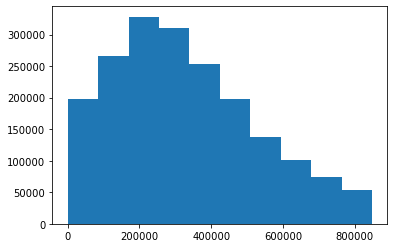

In [4]:
plt.hist(x='tax_value', data=df)
plt.show()

In [5]:
# Split our data for manipulation
train, validate, test = wp.split_data(df)

train <> (1077522, 6)
validate <> (461796, 6)
test <> (384830, 6)


In [6]:
# Variables for constructing models

x_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

x_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

x_test = test.drop(columns=['tax_value'])
y_test = test.tax_value


In [7]:
# Scaled Versions of the data

# Make it
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit it
scaler.fit(x_train)

# Use it
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)


In [8]:
# Got my data and it's prepped, now lets explore a bit
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924148 entries, 4 to 2152863
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqr_feet    float64
 3   tax_value   float64
 4   year_built  object 
 5   fips        object 
dtypes: float64(4), object(2)
memory usage: 102.8+ MB


In [9]:
# Recursive Feature Selection
ep.rfe_feature_rankings(x_train_scaled, x_train, y_train, 1)

,Var,Rank
2,sqr_feet,1
1,bathrooms,2
0,bedrooms,3
3,year_built,4
4,fips,5


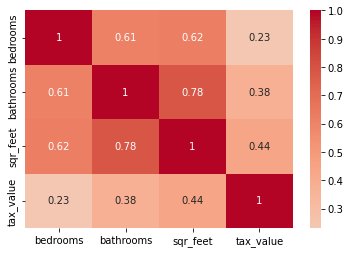

In [25]:
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True)
plt.show()


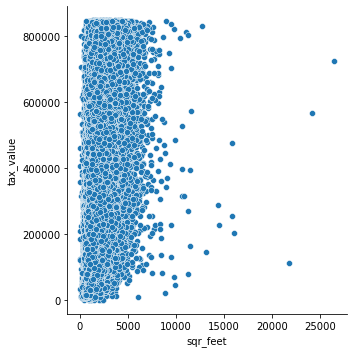

In [10]:
# Judging from the RFE ranking, gonna look into square footage more
sns.relplot(x='sqr_feet', y='tax_value', data=train)
plt.show()

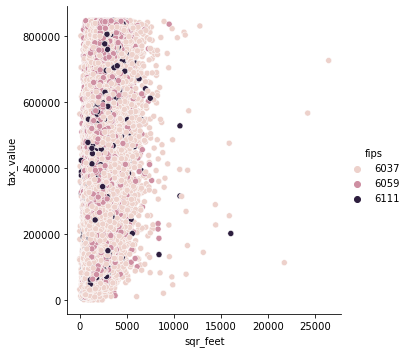

In [21]:
# Add hue to see if any catagories have impact
sns.relplot(x='sqr_feet', y='tax_value', data=train, hue='fips')
plt.show()

In [56]:
# fips details
train.fips.value_counts()

6037    724160
6059    269360
6111     84002
Name: fips, dtype: int64

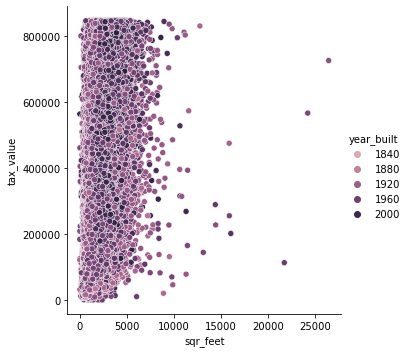

In [54]:
sns.relplot(x='sqr_feet', y='tax_value', data=train, hue='year_built')
plt.show()

In [57]:
# year_built details
train.year_built.value_counts()

1955    45699
1950    37934
1954    37359
1953    33377
1956    32838
        ...  
1877        1
1874        1
1876        1
1878        1
1833        1
Name: year_built, Length: 150, dtype: int64

In [11]:
# Well that's and outlier that throws the graph
train.sqr_feet.describe()

count    1.077522e+06
mean     1.693765e+03
std      6.564348e+02
min      1.000000e+00
25%      1.229000e+03
50%      1.558000e+03
75%      2.029000e+03
max      2.645000e+04
Name: sqr_feet, dtype: float64

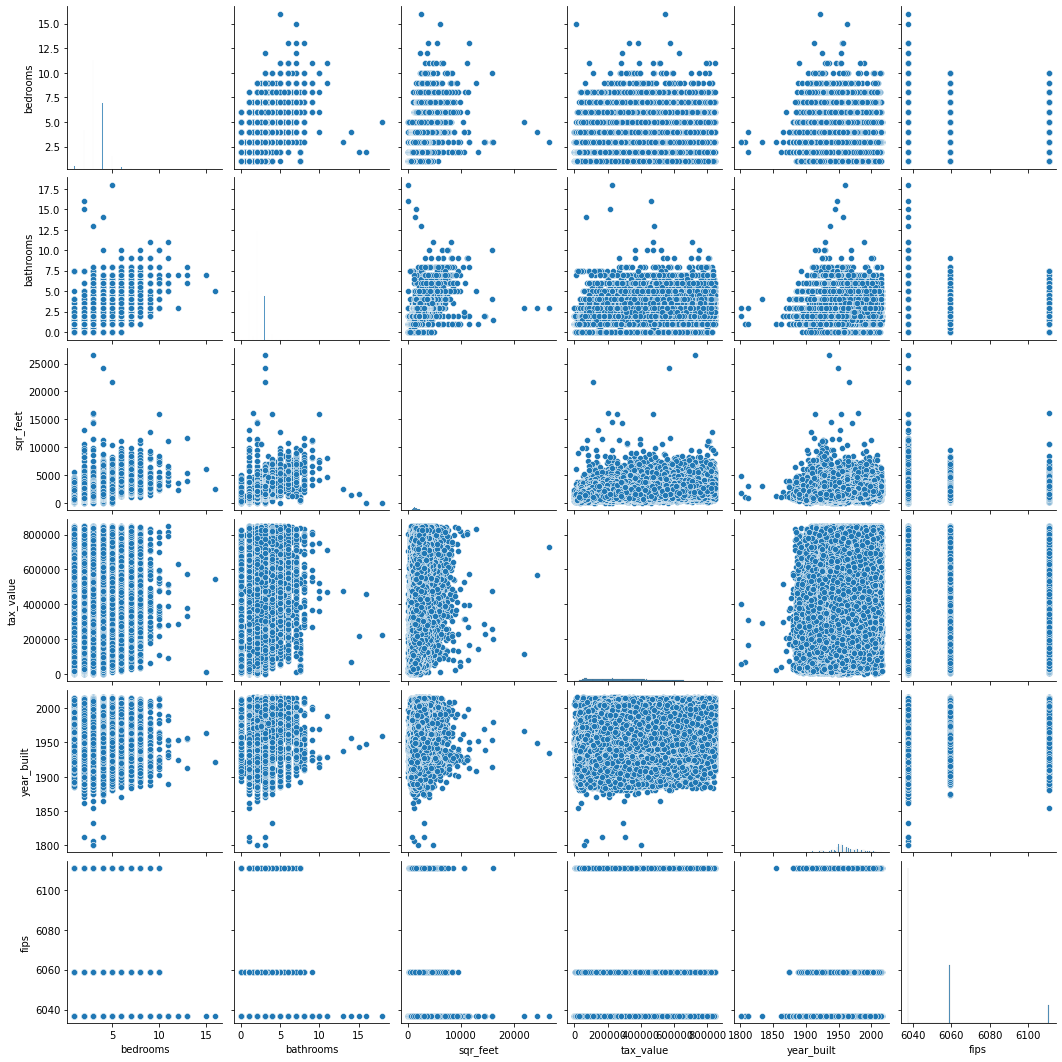

In [12]:
# look for any obvious relationships
sns.pairplot(train)
plt.show()

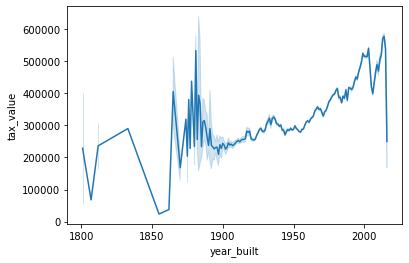

In [45]:
plt.figure()
sns.lineplot(train.year_built, train.tax_value)
plt.xlabel='Year Built'
plt.ylabel= 'Tax Value'
plt.title='Tax Value by Year Built'

plt.show()

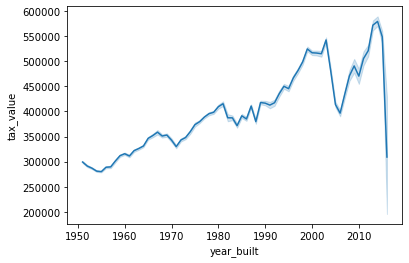

In [59]:
# Tax Value seems to become more stable (and hopefully easier to predict)
# when looking at home built after the year 1900

after_1950 = train[train.year_built > 1950].value_counts()

plt.figure()
plt.title='Tax Value by Year Built'
sns.lineplot('year_built', 'tax_value', data=after_1950)
plt.xlabel='Year Built'
plt.ylabel= 'Tax Value'

plt.show()

<Figure size 432x288 with 0 Axes>

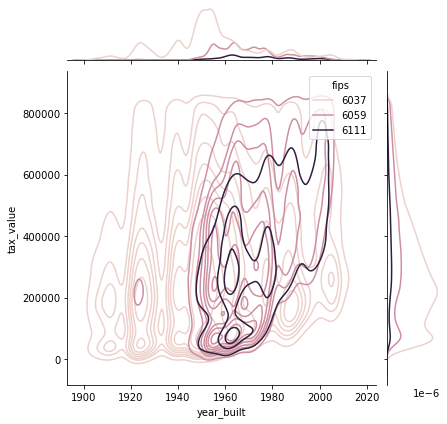

In [55]:
plt.figure()
sns.jointplot('year_built', 'tax_value', data=after_1900, hue='fips', kind='kde')
plt.xlabel='Year Built'
plt.ylabel= 'Tax Value'

plt.show()

In [ ]:
# I feel after these  visualizations, a case could be made to remove homes built before 1950
# such an adjustment would better represent all 3 counties in our data (based on FIPS)

NameError: name 'LogisticRegression' is not defined